In [108]:
from simulation import *
from aesthetics import *
from models import *
from data import *
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

# A model for flux prediction
- Reflect at 2*pi and compute JSD with reflection, then add the JSD value for each surface.
- Move by 1 bin and repeat.
- Note the lowest sum (for any bin shift) of JSDs. Call this J_symmetric.

- Compute the PDF on each surface (done)
- Compute the JDF between the PMFs. Call this J_bind.

- p_min: lowest probability means there is a high barrier.

Then: 
f = J_symmetric * J_bind * p_min.

In [191]:
def JSD(x, y): #Jensen-shannon divergence
    x = np.array(x)
    y = np.array(y)
    d1 = x * np.log2(2 * x / (x + y))
    d2 = y * np.log2(2 * y / (x + y))
    d1[np.isnan(d1)] = 0
    d2[np.isnan(d2)] = 0
    d = 0.5 * np.sum(d1 + d2)
    return d


In [192]:
def permute(x, shift):
    return np.roll(x, shift)

In [193]:
def reflect(x, point):
    return np.concatenate((x[point:], x[:point]))[::-1]

In [198]:
df = pd.DataFrame()
for file in range(len(unbound_files)):
    long_name = os.path.splitext(os.path.basename(unbound_files[file]))[0]
    short_name = re.search('^[^_]*', long_name).group(0)
    if short_name == 'chi1CYM185':
        pass
    else:
        data = np.genfromtxt(unbound_files[file])[1:]
        J_symmetric = 1.0
        for permutation in range(len(data)):
            J = JSD(data, reflect(data, permutation))
            if J < J_symmetric:
                J_symmetric = J
        df = df.append(pd.DataFrame({'Name': short_name,
                                     'J_symmetric': J_symmetric}, index=[0]), ignore_index=True)

In [199]:
tmp = pd.DataFrame()
for file in range(len(unbound_files)):
    long_name = os.path.splitext(os.path.basename(unbound_files[file]))[0]
    short_name = re.search('^[^_]*', long_name).group(0)
    if short_name == 'chi1CYM185':
        pass
    else:
        unbound_data = np.genfromtxt(unbound_files[file])[1:]
        bound_data = np.genfromtxt(bound_files[file])[1:]
        J = JSD(unbound_data, bound_data)
        tmp = tmp.append(pd.DataFrame({'Name': short_name,
                                     'J_bind': J}, index=[0]), ignore_index=True)

In [200]:
tmp.head()

,J_bind,Name
0,0.011806,chi1ARG119
1,0.046672,chi1ARG120
2,0.027365,chi1ARG123
3,0.005905,chi1ARG130
4,0.167753,chi1ARG151


In [201]:
df =df.merge(tmp, on='Name')

In [202]:
tmp = pd.DataFrame()
for file in range(len(unbound_files)):
    long_name = os.path.splitext(os.path.basename(unbound_files[file]))[0]
    short_name = re.search('^[^_]*', long_name).group(0)
    if short_name == 'chi1CYM185':
        pass
    else:
        unbound_data = np.genfromtxt(unbound_files[file])[1:]
        bound_data = np.genfromtxt(bound_files[file])[1:]
        p_min = min(np.concatenate((unbound_data, bound_data)))
        tmp = tmp.append(pd.DataFrame({'Name': short_name,
                                     'p_min': p_min}, index=[0]), ignore_index=True)

In [203]:
df = df.merge(tmp, on='Name')

In [204]:
df

,J_symmetric,Name,J_bind,p_min
0,0.133388,chi1ARG119,0.011806,0.0
1,0.189839,chi1ARG120,0.046672,0.0
2,0.042087,chi1ARG123,0.027365,0.0
3,0.043733,chi1ARG130,0.005905,0.0
4,0.021699,chi1ARG151,0.167753,0.0
5,0.032776,chi1ARG176,0.022304,0.0
6,0.051289,chi1ARG180,0.043847,0.0
7,0.100320,chi1ARG242,0.012198,0.0
8,0.102363,chi1ARG256,0.018063,0.0
9,0.089394,chi1ARG266,0.088928,0.0


In [205]:
df['Mike'] = df['J_bind'] * df['J_symmetric'] * df['p_min']

In [206]:
df.sort_values('Mike', ascending=False)

,J_symmetric,Name,J_bind,p_min,Mike
390,0.049324,chi2HIS73,0.030752,0.002373,3.599246e-06
1127,0.070685,psiGLY330,0.066656,0.000760,3.581799e-06
324,0.097132,chi2ASN85,0.077030,0.000398,2.979414e-06
319,0.145435,chi2ASN279,0.051165,0.000109,8.081159e-07
614,0.154191,chi3MET104,0.076319,0.000036,4.259936e-07
384,0.128233,chi2HIS128,0.020248,0.000145,3.759665e-07
316,0.039028,chi2ASN269,0.108671,0.000021,8.906062e-08
314,0.089880,chi2ASN22,0.006892,0.000105,6.503706e-08
318,0.019629,chi2ASN275,0.045090,0.000063,5.575579e-08
617,0.020569,chi3MET217,0.023699,0.000105,5.118025e-08


In [207]:
import pickle

In [208]:
with open('Flux-results.pickle', 'rb') as pickle_file:
    flux = pickle.load(pickle_file)

In [209]:
df['File'] = df['Name']
correlation = pd.DataFrame()
correlation = df.merge(flux, on='File')

In [210]:
correlation

,J_symmetric,Name,J_bind,p_min,Mike,File,Flux with catalysis,Flux with catalysis SEM,Flux without catalysis,Flux without catalysis SEM,Ratio
0,0.133388,chi1ARG119,0.011806,0.0,0.0,chi1ARG119,-0.085266,0.006718,-0.058314,0.007144,1.462175
1,0.189839,chi1ARG120,0.046672,0.0,0.0,chi1ARG120,0.065552,0.011386,-0.028742,0.006518,-2.280685
2,0.042087,chi1ARG123,0.027365,0.0,0.0,chi1ARG123,-0.232762,0.006610,-0.102740,0.015365,2.265536
3,0.043733,chi1ARG130,0.005905,0.0,0.0,chi1ARG130,-0.132464,0.007214,-0.007966,0.004643,16.628032
4,0.021699,chi1ARG151,0.167753,0.0,0.0,chi1ARG151,24.574252,0.045719,0.709663,0.070110,34.628067
5,0.032776,chi1ARG176,0.022304,0.0,0.0,chi1ARG176,0.588888,0.028794,-0.287256,0.036240,-2.050045
6,0.051289,chi1ARG180,0.043847,0.0,0.0,chi1ARG180,4.535876,0.003133,0.074282,0.015266,61.062674
7,0.100320,chi1ARG242,0.012198,0.0,0.0,chi1ARG242,-1.129960,0.003964,0.008774,0.004333,-128.790971
8,0.102363,chi1ARG256,0.018063,0.0,0.0,chi1ARG256,0.014111,0.003337,-0.020649,0.002595,-0.683373
9,0.089394,chi1ARG266,0.088928,0.0,0.0,chi1ARG266,0.012791,0.002237,-0.032071,0.006434,-0.398839


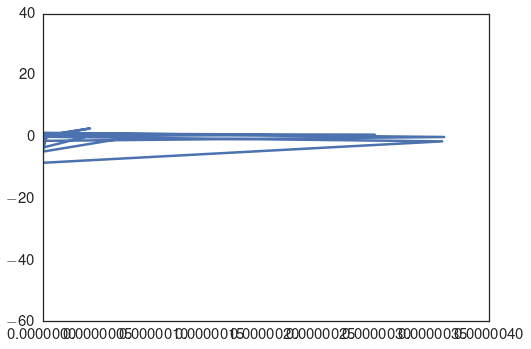

In [211]:
plt.plot(correlation['Mike'], correlation['Flux with catalysis'])

In [212]:
correlation[correlation['p_min'] > 0]

,J_symmetric,Name,J_bind,p_min,Mike,File,Flux with catalysis,Flux with catalysis SEM,Flux without catalysis,Flux without catalysis SEM,Ratio
314,0.089880,chi2ASN22,0.006892,0.000105,6.503706e-08,chi2ASN22,-0.021266,0.001649,0.000560,0.003701,-37.987043
316,0.039028,chi2ASN269,0.108671,0.000021,8.906062e-08,chi2ASN269,0.741779,0.002441,0.047384,0.008384,15.654646
317,0.008325,chi2ASN272,0.037542,0.000072,2.262800e-08,chi2ASN272,0.205536,0.002395,0.001263,0.001357,162.714779
318,0.019629,chi2ASN275,0.045090,0.000063,5.575579e-08,chi2ASN275,0.327886,0.002734,0.011890,0.002325,27.576545
319,0.145435,chi2ASN279,0.051165,0.000109,8.081159e-07,chi2ASN279,-0.002048,0.001356,-0.011157,0.001448,0.183540
321,0.023854,chi2ASN326,0.008336,0.000181,3.599156e-08,chi2ASN326,0.114071,0.002283,-0.006608,0.003371,-17.262420
322,0.016783,chi2ASN53,0.003513,0.000315,1.857073e-08,chi2ASN53,0.010918,0.001143,0.009840,0.002198,1.109488
324,0.097132,chi2ASN85,0.077030,0.000398,2.979414e-06,chi2ASN85,0.614172,0.003477,0.002654,0.002712,231.428144
384,0.128233,chi2HIS128,0.020248,0.000145,3.759665e-07,chi2HIS128,-0.104652,0.003188,0.010422,0.002363,-10.041759
388,0.024056,chi2HIS48,0.016017,0.000021,8.090719e-09,chi2HIS48,-0.031817,0.001821,-0.018895,0.003995,1.683892


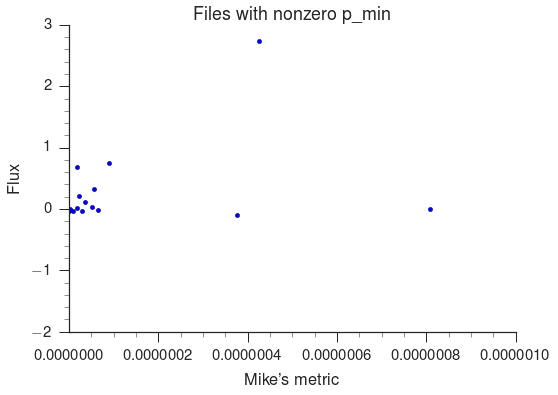

In [217]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(correlation[correlation['p_min'] > 0]['Mike'], correlation[correlation['p_min'] > 0]['Flux with catalysis'])
ax.set_xlabel('Mike\'s metric')
ax.set_ylabel('Flux')
ax.set_title('Files with nonzero p\_min')
ax.set_xlim([0.000000001, 0.000001])
fetching_plot(fig)

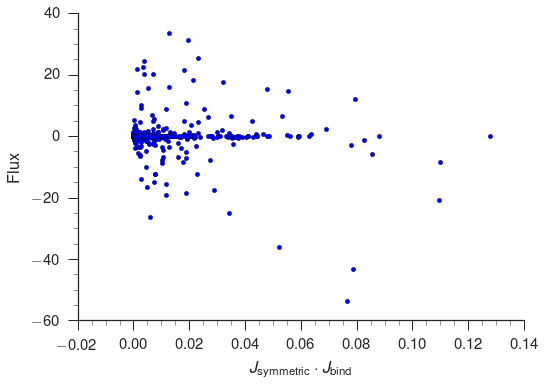

In [214]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(correlation['J_symmetric'] * correlation['J_bind'], correlation['Flux with catalysis'])
ax.set_xlabel(r'$J_\text{symmetric} \cdot J_\text{bind}$')
ax.set_ylabel('Flux')
fetching_plot(fig)

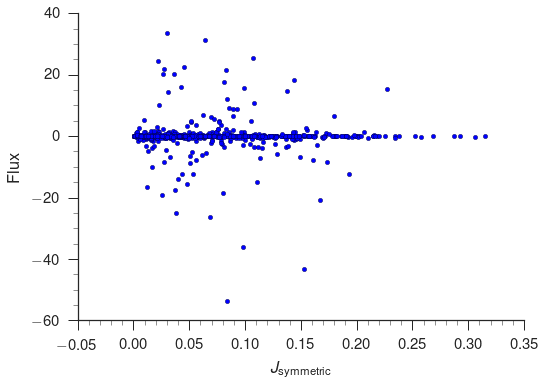

In [215]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(correlation['J_symmetric'], correlation['Flux with catalysis'])
ax.set_xlabel(r'$J_\text{symmetric}$')
ax.set_ylabel('Flux')
fetching_plot(fig)

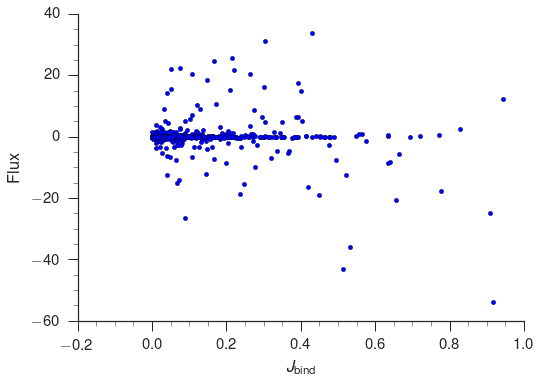

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(correlation['J_bind'], correlation['Flux with catalysis'])
ax.set_xlabel(r'$J_\text{bind}$')
ax.set_ylabel('Flux')
ax.set_xlim
fetching_plot(fig)

In [222]:
frocorrelation.sort_values('Flux with catalysis', ascending=False)[0:20]

,J_symmetric,Name,J_bind,p_min,Mike,File,Flux with catalysis,Flux with catalysis SEM,Flux without catalysis,Flux without catalysis SEM,Ratio
1281,0.029831,psiSER311,0.429173,0.0,0.0,psiSER311,33.652281,0.004932,-0.051298,0.008780,-656.017735
194,0.064510,chi1PHE173,0.302436,0.0,0.0,chi1PHE173,31.200045,0.014472,-0.078738,0.012200,-396.249657
32,0.107566,chi1ASP152,0.215674,0.0,0.0,chi1ASP152,25.618597,0.002859,-0.020989,0.007605,-1220.552886
4,0.021699,chi1ARG151,0.167753,0.0,0.0,chi1ARG151,24.574252,0.045719,0.709663,0.070110,34.628067
83,0.045693,chi1GLU3,0.074232,0.0,0.0,chi1GLU3,22.402664,0.009573,0.025930,0.004183,863.983257
392,0.027576,chi2ILE136,0.051351,0.0,0.0,chi2ILE136,22.000327,0.113141,-1.183333,0.132258,-18.591826
357,0.082659,chi2GLN70,0.219620,0.0,0.0,chi2GLN70,21.601027,0.002754,0.016187,0.007527,1334.480608
43,0.026511,chi1ASP309,0.262769,0.0,0.0,chi1ASP309,20.386404,0.006846,-0.062922,0.002633,-323.996746
207,0.035980,chi1PHE40,0.106948,0.0,0.0,chi1PHE40,20.363098,0.049409,0.107012,0.099053,190.287206
100,0.143882,chi1ILE166,0.148744,0.0,0.0,chi1ILE166,18.442161,0.053690,0.087870,0.021395,209.879491


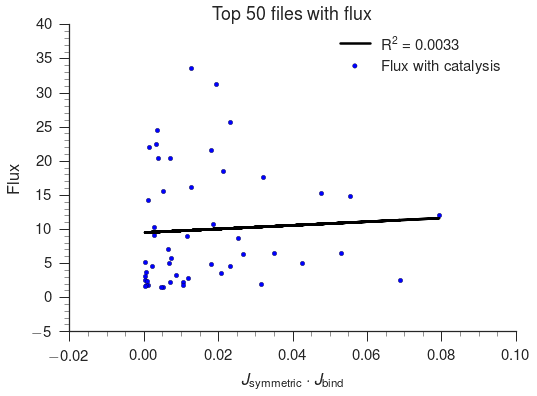

In [248]:
x = correlation.sort_values('Flux with catalysis', ascending=False)[0:50]['J_bind'] * correlation.sort_values('Flux with catalysis', ascending=False)[0:50]['J_symmetric']
y = correlation.sort_values('Flux with catalysis', ascending=False)[0:50]['Flux with catalysis']

slope, intercept, r, pval, stderr = sc.stats.linregress(x, y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.plot([i for i in x], [slope * i + intercept for i in x], label=r'R$^{{2}}$ = {0:0.4f}'.format(r**2), c='k')
ax.set_xlabel(r'$J_\text{symmetric} \cdot J_\text{bind}$')
ax.set_ylabel('Flux')
ax.set_title('Top 50 files with flux')
ax.legend()
fetching_plot(fig)